Выберите сферу, по которой хотите посмотреть индексы (1 - политическая, 2 - экономико-социальная): 1
Хотите посмотреть список доступных стран? [да/нет]да
{'usa', 'china', 'russia'}
Введите список желаемых стран через запятую (без пробелов).
Если хотите посмотреть индексы по всем странам, введите 1
china
Внимание! Форматы "отчет" и "оба формата" возможны только при выборе до 5 стран
Выберите желаемый формат вывода (1 - отчет, 2 - таблица, 3 - оба формата): 1
Введите путь к папке, в которую сохранятся данные в выбранном формате
Формат ввода: C:\Users\bendr\Documents\Основы Python\проект
C:\Users\bendr\Documents\Основы Python\проект
Выберите год (2017, 2018, 2019): 2017


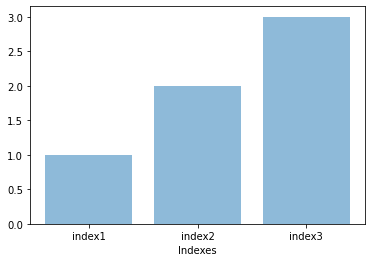

In [211]:
# тут загружаются библиотеки
# и у пользователя спрашивается, стоит ли у него библиотека,
# необходимая для формирования отчета 

import pandas as pd
import time
import numpy as np
from matplotlib import pyplot as plt
from fpdf import FPDF

# тут скоро будет загрузка нашего прелестного датасета
# вместо него тут создается тестовый датасет

pol = pd.DataFrame([[2018,3,2,1], [2017,1,2,3], [2019,3,4,-5]], index=['russia', 'china','usa'], columns=['year','index1', 'index2', 'index3'])
soc = pd.DataFrame([[2018,1,2,3], [2019,3,2,-1], [2018,5,4,3]], index=['russia', 'russia','usa'], columns=['year','index1', 'index2', 'index3'])
full_set = {'1':pol, '2':soc}

# ГОТОВЬТЕСЬ ЛИЦЕЗРЕТЬ УЖАСНОЕ

def our_chudo():
    
# класс, который используется в функции country_question для завершения внешнего цикла while

    class idontwannacontinue(Exception): pass
    data = pd.DataFrame()
    a = pd.DataFrame()
    report = f''
    error = 0

# функция для выведения нужного сообщения об ошибке
    
    def error_msg(code):
        error_msgs = ['Сфера не найдена.', 'Некорректный формат.', 'Отчеты доступны только при выборе 1 страны']
        print(error_msgs[code])

# функция, запрашивающая у пользователя, хочет ли он посмотреть список доступных стран
# при согласии выводит на экран список стран без повторений
# также возвращает ответ пользователя (используется в функции country_question)

    def country_list():
        list_c = input('Хотите посмотреть список доступных стран? [да/нет]')
        if list_c == 'да':
            print(set(a.index))
        return list_c

# функция, запрашивающая у пользователя страны, которые он хочет просмотреть
# если страны нет в датасете, выводит на экран сообщение об ошибке
# и вызывает функцию country_list (снова спрашивает, хочет ли пользователь посмотреть список стран)
# в случае отказа вызывает исключение idontwannacontinue, и на экран выводится сообщение
# о расстройстве создателей тем фактом, что пользователь не хочет работать с программой
# предполагается, что раз пользователь, введя некорректное название страны, 
# отказывается посмотреть список доступных стран, то он не хочет пользоваться программой
# и хочет из нее выйти
    
    def country_question():
        print('Введите список желаемых стран через запятую (без пробелов).',
              'Если хотите посмотреть индексы по всем странам, введите 1',sep='\n')
        countries = input()
        try:
            if '1' not in countries:
                countries = countries.split(',')
                return a.loc[countries,:]
            else:
                return a
        except KeyError:
            print('Такой страны в агрегаторе пока нет.')
            answer = country_list()
            if answer == 'да':
                country_question()
            else:
                raise idontwannacontinue

# функция, генерирующая pdf-отчет по выбранной пользователем стране
# сначала в ней создается bar chart из пакета pyplot
# а затем он присоединяется в созданному при помощи класса PDF из билиоиотеки fpdf
# файлу pdf и сохраняется в указанную пользователем папку
                
    def report(direc):
        year = int(input('Выберите год (2017, 2018, 2019): '))
        pdf = FPDF()
        if len(set(data.index)) == 1:
            country_name = set(data.index)
            to_plot = data[data['year']==year].iloc[:,1:]
            x = list(to_plot.columns)
            values = to_plot.values.tolist()
            y = np.arange(len(values[0]))
            plt.bar(y, values[0], align='center', alpha=0.5)
            plt.xticks(y, x)
            plt.xlabel('Indexes')
            plt.savefig('barchart.png')
            pdf.add_page()
            pdf.set_xy(0, 0)
            pdf.set_font('arial', 'B', 12)
            pdf.cell(60)
            pdf.cell(75, 10, f"Country report {''.join(list(country_name))}", 0, 2, 'C')
            pdf.cell(90, 10, " ", 0, 2, 'C')
            pdf.cell(-40) 
            pdf.image('barchart.png', x = None, y = None, w = 0, h = 0, type = '', link = '')
            pdf.output(direc)

# программа запрашивает у пользователя сферу, по которой он хотел бы посмотреть индексы
# коды сфер являются ключами словаря, в котором хранятся два датафрейма
# один - с политическими индексами, второй - с социально-экономическими
# если кода, введенного пользователем, среди ключей словаря нет
# на экран выводится сообщение об ошибке и цикл завершается

    sphere = input('Выберите сферу, по которой хотите посмотреть индексы (1 - политическая, 2 - экономико-социальная): ')
    try:
        while True:
            try:
                a = full_set[sphere]
            except KeyError:
                error_msg(0)
                error += 1
                break
                
# в случае правильно введенного кода сферы, поочередно вызываются функции country_list и country_question
# функционал которых был описан выше
            country_list()
            data = country_question()
        
# создается переменная, которая в дальнейшем используется для проверки возможности создания отчета
# он возможен, только если длина множества, содержащего индексы (страны) датафрейма data, равна 1
# иными словами, что пользователь хочет посмотреть только одну страну

            report_check = len(set(data.index)) == 1
    
# у пользователя заправшивается фомат вывода данных
# если код, выбранный им, некорректный (не входит в множество (1,2,3)), 
# то на экран выводится сообщение об ошибке

            print('Внимание! Форматы "отчет" и "оба формата" возможны только при выборе одной страны')
            form = input('Выберите желаемый формат вывода (1 - отчет, 2 - таблица, 3 - оба формата): ')

            if form not in ['1', '2', '3']:
                error_msg(1)
                error += 1
                break
                
# у пользователя запрашивается путь к папке, куда он хочет сохранить данные в выбранном формате

            print('Введите путь к папке, в которую сохранятся данные в выбранном формате')
            print(r'Формат ввода: C:\Users\bendr\Documents\Основы Python\проект')
            direc = input()
            
# в зависимости от выбранного пользователем формата, ко введенному им адресу
# прибалвяется название финального файла в нужном разрешении

            if form == '2':
                direc = direc+'\\report.xlsx'
                data.to_excel(direc)
                display(data)
                break
                
# в случае выбора пользователем форматов 1 и 3 программа проверяет,
# сколько стран выбрал пользователь
# если больше 1, то на экран выводится сообщение об ошибке и цикл прекращается

            elif form == '1':
                direc = direc+'\\report.pdf'
                if report_check:
                    report(direc)
                else:
                    error_msg(2)
                    error += 1
                break
            elif form == '3':
                direc = direc+'\\report.xlsx'
                data.to_excel(direc)
                display(data)
                direc1 = direc+'\\report.pdf'
                if report_check:
                    report(direc1)
                else:
                    error_msg(2)
                    error += 1
                break
    except idontwannacontinue:
        print('Видимо, вы не хотите лицезреть чудо. Мы очень обижены :(')
        pass

# после выхода из цикла программа проверяет, выводилось ли на экран сообщение об ошибке
# если выход из цикла был обусловлен предугаданной разработчиком ошибкой,
# то программа спрашивает у пользователя, хочет ли он попробовать сначала
# если он отказывается, то выводится уже знакомое нам сообщение об обиде разработчиков

    if error == 1:
        again = input('Хотите начать сначала? [да/нет] ')
        if again.lower() == 'да':
            our_chudo()
        elif again.lower() == 'нет':
            print('Видимо, вы не хотите лицезреть чудо. Мы очень обижены :(')
our_chudo()